In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.mode.copy_on_write = True

# Paso 1: Lectura de datos

In [49]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('games.csv')

Saving games.csv to games (8).csv


# Paso 2: Preparar datos

In [50]:
# Reemplazar nombres de las columnas por minúsculas
new_col_names = []

for old_name in df.columns:
  clean_names = old_name.lower()
  new_col_names.append(clean_names)

df.columns = new_col_names

print(df)
df.info()

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

### Valores ausentes

In [51]:
# Tratar valores ausentes categóricos
df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['rating'] = df['rating'].fillna('No Rating')

# Tratar valores ausentes numéricos
## En la columna de 'year_of_release' reemplazar con un 0 generaría un año ficticio y un outlier artificial que puede afectar el análisis
## para evitar esto, relleno los nulos con la mediana
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

## En la columna 'critic_score' reemplazar con un 0 no tiene sentido, pero tampoco usando algún estadístico, ya que, que no haya calificación
## ya es un dato importante en sí. En esta columna dejaré los nulos sin tratar.

## En la columna 'user_score' tenemos datos mixtos, números de tipo object, texto (tbd) y nulos, en este caso, es importante
## separar los tbd del resto de la columna.
df['is_user_score_tbd'] = df['user_score'] == 'tbd'

# Replace 'tbd' values in 'user_score' with NaN before converting to numeric
# Reemplazaré los valores 'tbd' en la columna 'user_score' con NaN antes de convertir la columna a numérico
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.info

<bound method DataFrame.info of                                 name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

          rating  is_user_score_tbd  
0              E              False  
1      No Rating              False  
2              E              False  
3              E              False  
4      No Rating              False  
...          ...                ...  
16710  No Rating              False  
16711  No Rating              False  
16712  No Rating              False  
16713  No Rating              False  
16714  No Rating              False  

[16715 rows x 12 columns]>

### Convertir al tipo de dato necesario

In [52]:
# Transformo el tipo de dato de la columna 'year_of_release' de float a Int64, los años son números enteros y no es necesario
# que tengan decimales
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Antes de transformar las columna 'critic_score' hay que verificar si es seguro transformarla al tipo entero o si perderemos algo en la transformación
print(np.array_equal(df['critic_score'], df['critic_score'].astype('Int64')))

# No es seguro transformar a entero, el tipo de dato debe permanecer como float

False


### Calcular ventas totales

In [53]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Paso 3. Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?



    year_of_release  number_of_games
0              1980                9
1              1981               46
2              1982               36
3              1983               17
4              1984               14
5              1985               14
6              1986               21
7              1987               16
8              1988               15
9              1989               17
10             1990               16
11             1991               41
12             1992               43
13             1993               62
14             1994              121
15             1995              219
16             1996              263
17             1997              289
18             1998              379
19             1999              338
20             2000              350
21             2001              482
22             2002              829
23             2003              775
24             2004              762
25             2005              939
2

<Axes: title={'center': 'Número de juegos lanzados por año'}, xlabel='Año de lanzamiento', ylabel='Número de juegos'>

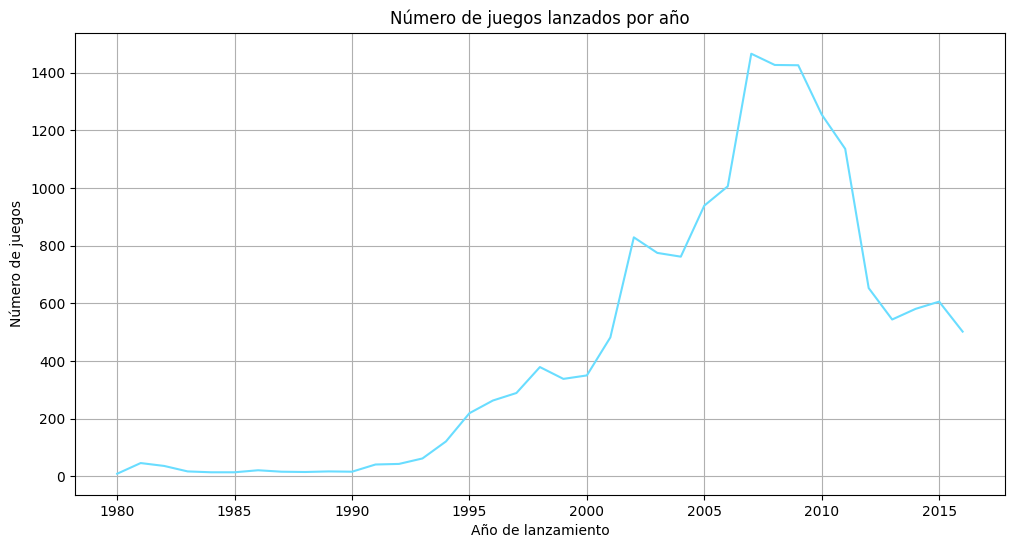

In [54]:
games_per_year = (
    df.groupby('year_of_release')['name']
      .count()
      .reset_index()
      .rename(columns={'year_of_release': 'year_of_release', 'name': 'number_of_games'})
      .sort_values('year_of_release')
)

print(games_per_year)

games_per_year.plot(
    kind='line',
    figsize=(12,6),
    x='year_of_release',
    xlabel='Año de lanzamiento',
    y='number_of_games',
    ylabel='Número de juegos',
    title='Número de juegos lanzados por año',
    legend=False,
    grid=True,
    color='#69DDFF'
)

Los datos demuestran que la mayor cantidad de videojuegos lanzados ocurrió después de la decada del 2000 hasta el 2010, cayendo de nuevo pero nunca produciéndose tan pocos videojuegos como antes del 2000.

El año con mayor producción de videojuegos fue el 2007 (1466), y el año con menor producción de videojuegos fue el 1980 (9) que es el primer año del que se tiene registro.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?



   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.52
2       3DS       259.00
29       XB       257.74
5        GB       255.46
11      NES       251.05
10      N64       218.68
23     SNES       200.04
7        GC       198.93
30     XOne       159.32
0      2600        96.98
27     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
8       GEN        30.77
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


<Axes: title={'center': 'Número de ventas por plataforma'}, xlabel='Plataforma', ylabel='Número de ventas'>

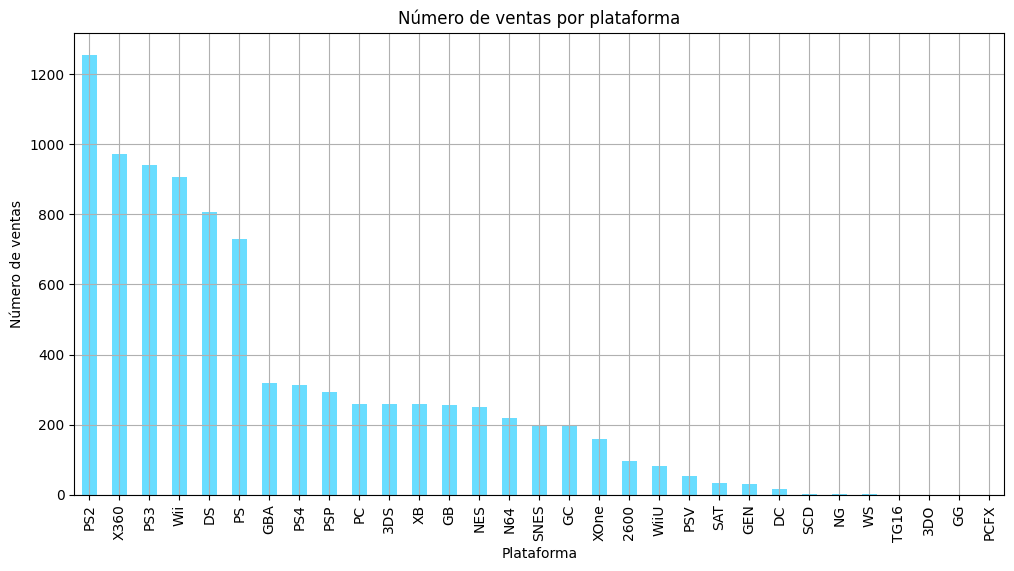

In [55]:
sales_per_platform = (
    df.groupby('platform')['total_sales']
      .sum()
      .reset_index()
      .rename(columns={'platform': 'platform', 'total_sales': 'total_sales'})
      .sort_values('total_sales', ascending=False)
)

print(sales_per_platform)

sales_per_platform.plot(
    kind='bar',
    figsize=(12,6),
    x='platform',
    xlabel= 'Plataforma',
    y='total_sales',
    ylabel='Número de ventas',
    title='Número de ventas por plataforma',
    legend=False,
    grid=True,
    color='#69DDFF'
)

   platform  year_of_release  total_sales
0       PS2             2011         0.45
1       PS2             2007        98.20
2       PS2             2008        53.90
3       PS2             2009        26.40
4       PS2             2006       103.42
5       PS2             2010         5.64
6       PS2             2004       211.81
7       PS2             2003       184.31
8       PS2             2002       205.38
9       PS2             2005       160.66
10      PS2             2001       166.43
11      PS2             2000        39.17
12     X360             2005         8.25
13     X360             2012        99.74
14     X360             2013        88.58
15     X360             2011       143.84
16     X360             2015        11.96
17     X360             2007       105.59
18     X360             2008       135.26
19     X360             2014        34.74
20     X360             2009       120.29
21     X360             2010       170.03
22     X360             2016      

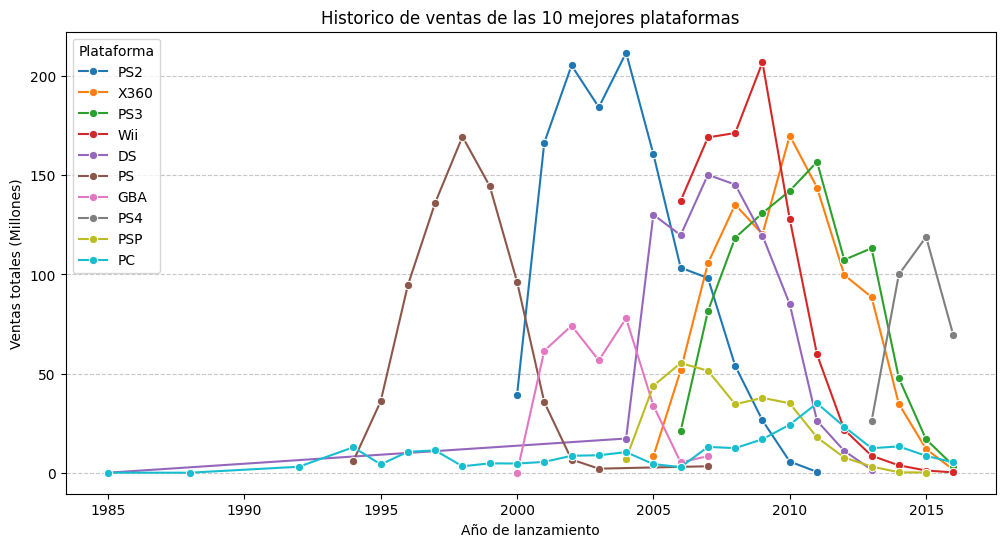

In [56]:
# Mostrar el top 10 de las plataformas más vendidas
sales_per_platform_10 = sales_per_platform.head(10)

# Agrupar por año y por plataforma
platforms_per_year = (
    df.groupby(['year_of_release', 'platform'])['total_sales'].sum()
    .reset_index()
    .sort_values('platform', ascending=False)
)

# Unir el top 10 de las plataformas con más ventas con la agrupación de las plataformas por año
top_10 = sales_per_platform_10[['platform']].merge(
    platforms_per_year,
    on='platform',
    how='inner'
)

# Mostrar el top 10 de ventas por año
print(top_10.head(50))

plt.figure(figsize=(12,6))
sns.lineplot(
    data=top_10,
    x='year_of_release',
    y='total_sales',
    hue='platform',
    marker='o'
)

plt.title("Historico de ventas de las 10 mejores plataformas")
plt.xlabel("Año de lanzamiento")
plt.ylabel('Ventas totales (Millones)')
plt.legend(title="Plataforma")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



*   Elegí las 10 plataformas más populares.
*  PC no ha tenido más de 50 millones de ventas por año pero desde 1985 hasta 2015 es la única plataforma que aún sigue vigente.
*   Cada plataforma dura aproximadamente 10 años en vigencia hasta que una nueva consola aparece
*   PS2 ha sido la consola con más ventas históricamente, sus ventas disminuyeron drásticamente luego de la aparición de la Wii y la PS3 en el 2007
*   La consola con más ventas en el 2015 fue la PS4







### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.



*   Las plataformas tienen un ciclo de vida de 10 años
*   Los datos de antes del 2010 son muy diferentes a las tendencias actuales
*   Los datos de 2016 están incompletos, no hay suficientes datos de este año y podría sesgar el análisis
* Xbox PlayStation y Nintendo son las 3 Empresas más relevantes en la industria.

Usaré los datos de la PS4, Xbox360, Wii y PC durate el período 2010 - 2015 para predecir 2017




In [57]:
# Selecciono las 4 plataformas más relevantes a partir del 2010

df_new = df[(df['year_of_release'] > 2009) & (df['year_of_release'] < 2016)]

df_new = df_new[df_new['platform'].isin(['PS4', 'Wii', 'X360', 'PC'])]

df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_user_score_tbd,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,False,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,False,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,False,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No Rating,False,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,False,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,Driving Simulator 2011,PC,2011,Racing,0.00,0.01,0.00,0.00,NaN,NaN,No Rating,False,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,False,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,False,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,False,0.01


### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

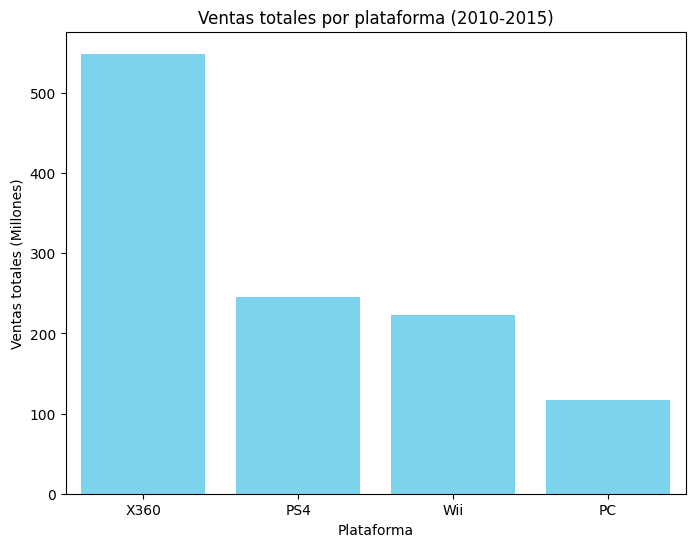

In [58]:
df_new_per_platform = (
    df_new.groupby('platform')['total_sales'].sum()
    .reset_index()
    .sort_values('total_sales', ascending=False)
)

df_new_per_platform

plt.figure(figsize=(8,6))

sns.barplot(
    data=df_new_per_platform,
    x='platform',
    y='total_sales',
    color='#69DDFF'
)

plt.title('Ventas totales por plataforma (2010-2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (Millones)')
plt.show()

<Figure size 1200x800 with 0 Axes>

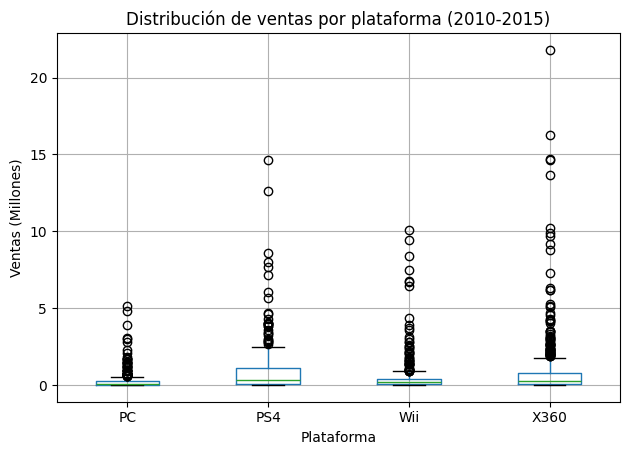

In [59]:
plt.figure(figsize=(12,8))
df_new.boxplot(column="total_sales", by="platform")
plt.title("Distribución de ventas por plataforma (2010-2015)")
plt.suptitle('')
plt.xlabel("Plataforma")
plt.ylabel("Ventas (Millones)")
plt.tight_layout()
plt.show()

El rango intercuártilico de la PS4 es más amplio, lo que indica mayor variabilidad en la venta de sus títulos.

Los boxplots muestran medianas similares, pero las colas (outliers) son muy distintas. X360 y PS4 tienen títulos con ventas mucho más altas que Wii y PC. Eso marca una diferencia en el impacto de ciertos juegos.

Las medianas de las plataformas son muy similares, esto demuestra que la mayoría de sus títulos en ventas se comportan de maneras muy parecidas.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [60]:
x360_data = df_new[df_new['platform'] == 'X360']
# Creo una nueva columna para estandarizar los puntajes.
x360_data['user_score_10'] = x360_data['user_score'] * 10

# Creo una nueva columna en donde se encuentre el puntaje promedio
x360_data['avg_score'] = x360_data[['user_score_10', 'critic_score']].mean(axis=1)

x360_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_user_score_tbd,total_sales,user_score_10,avg_score
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,False,21.82,63.0,62.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,False,16.27,81.0,89.0
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,False,14.73,34.0,61.0
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,False,14.62,63.0,75.0
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,False,13.68,48.0,65.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,Bullet Soul: Tama Tamashii,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,False,0.01,NaN,NaN
16576,DoDonPachi Daifukkatsu: Black Label,X360,2011,Shooter,0.00,0.00,0.01,0.00,NaN,NaN,No Rating,False,0.01,NaN,NaN
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,False,0.01,21.0,35.0
16647,Metal Gear Solid HD Edition,X360,2011,Action,0.00,0.00,0.01,0.00,NaN,NaN,M,True,0.01,NaN,NaN


In [61]:
# Correlación X360
correlation_x360 = x360_data[['avg_score', 'total_sales']].corr()
correlation_x360

,avg_score,total_sales
avg_score,1.000000,0.213062
total_sales,0.213062,1.000000


La correlación es positiva, pero es debil. Lo que indica que los puntajes no afectan tanto la variabilidad en ventas. Es probable que otros factores como marketing, franquicias y popularidad tengan un mayor efecto en ventas que el puntaje.

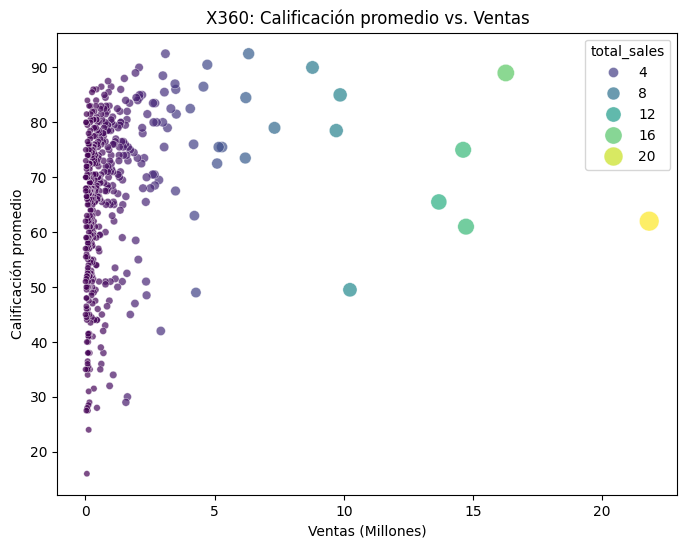

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data= x360_data,
    x='total_sales',
    y='avg_score',
    size='total_sales',
    hue='total_sales',
    sizes=(20, 200),
    palette='viridis',
    alpha=0.7
)

plt.title("X360: Calificación promedio vs. Ventas")
plt.xlabel("Ventas (Millones)")
plt.ylabel("Calificación promedio")
plt.show()

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [63]:
games_on_4_platforms = (
    df_new.groupby('name')['platform']
    .nunique()
    .reset_index()
    .query('platform == 4')
)

games_on_4_platforms
games_on_4_platforms_merged = games_on_4_platforms.merge(
    df_new,
    on='name',
    how='inner'
)

games_on_4_platforms_merged['user_score_10'] = (games_on_4_platforms_merged['user_score'] * 10)

games_on_4_platforms_merged['avg_score'] = games_on_4_platforms_merged[['critic_score', 'user_score']].mean(axis=1)

games_on_4_platforms_merged = games_on_4_platforms_merged.drop('platform_x', axis=1)

games_on_4_platforms_merged.rename(columns={'platform_y': 'platform'}, inplace=True)

games_on_4_platforms_merged

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,is_user_score_tbd,total_sales,user_score_10,avg_score
0,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,False,4.22,42.0,44.10
1,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,False,3.01,63.0,46.65
2,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,False,0.40,46.0,45.80
3,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,False,0.38,43.0,4.30
4,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,False,6.08,57.0,43.85
5,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E,False,2.92,42.0,4.20
6,FIFA 15,Wii,2014,Sports,0.15,0.37,0.00,0.04,NaN,4.3,E,False,0.56,43.0,4.30
7,FIFA 15,PC,2014,Sports,0.00,0.27,0.00,0.02,82.0,4.2,E,False,0.29,42.0,43.10


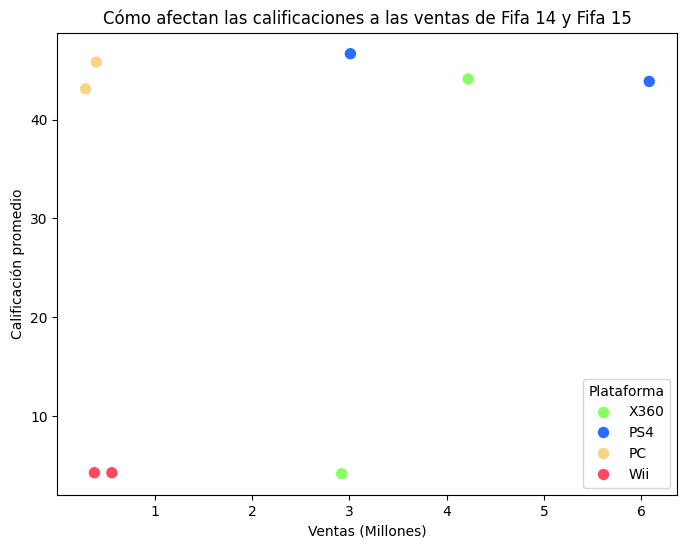

In [64]:
colors = {
    'X360': '#87FF65',
    'PS4': '#256EFF',
    'PC': '#F7D488',
    'Wii': '#FF495C'
}

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=games_on_4_platforms_merged,
    x='total_sales',
    y='avg_score',
    hue='platform',
    palette=colors,
    s=80
)

plt.title("Cómo afectan las calificaciones a las ventas de Fifa 14 y Fifa 15")
plt.xlabel("Ventas (Millones)")
plt.ylabel("Calificación promedio")
plt.legend(title="Plataforma")
plt.show()

A pesar de que son los mismos juegos, es evidente que el éxito depende de la plataforma que se elija para la compra.
* PS4 y X360 lideran la lista, con una calificación promedio por encima de los 40 puntos y entre 3 a 6 millones de ventas.
* Las plataformas con peor recepción son PC y Wii. Wii es la última en la lista, con calificaciones por debajo de los 10 puntos y menos de un millón de ventas. A pesar de que para PC tenemos calificaciones promedio de más de 40 puntos, las ventas no mejoran mucho, con también menos de 1 millón de ventas por cada juego. Esto demuestra que no siempre una buena calificación garantiza muchas ventas.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [65]:
# Géneros más rentables vs menos rentables

df_new_genre = (
    df_new.groupby('genre')['total_sales'].sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
print('Géneros más rentables')
print(df_new_genre.head())
print('')
print('Géneros menos rentables')
print(df_new_genre.tail())
print('')
print('')

# Géneros más rentables vs menos rentables por plataforma

df_new_genre_platform = (
    df_new.groupby(['genre', 'platform'])['total_sales'].sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
print('Géneros más rentables por plataforma')
print(df_new_genre_platform.head(20))
print('')
print('Géneros menos rentables por plataforma')
print(df_new_genre_platform.tail())

Géneros más rentables
           genre  total_sales
0         Action       287.91
8        Shooter       251.44
10        Sports       168.79
3           Misc       155.71
7   Role-Playing        93.03

Géneros menos rentables
         genre  total_sales
9   Simulation        26.24
2     Fighting        24.88
11    Strategy        20.72
1    Adventure        16.88
5       Puzzle         3.25


Géneros más rentables por plataforma
           genre platform  total_sales
34       Shooter     X360       159.66
3         Action     X360       142.78
14          Misc      Wii        86.83
42        Sports     X360        83.43
1         Action      PS4        81.25
32       Shooter      PS4        64.37
15          Misc     X360        60.38
2         Action      Wii        42.79
40        Sports      PS4        41.03
30  Role-Playing     X360        37.78
41        Sports      Wii        37.40
18      Platform      Wii        29.22
27  Role-Playing       PC        28.07
26        Racing    

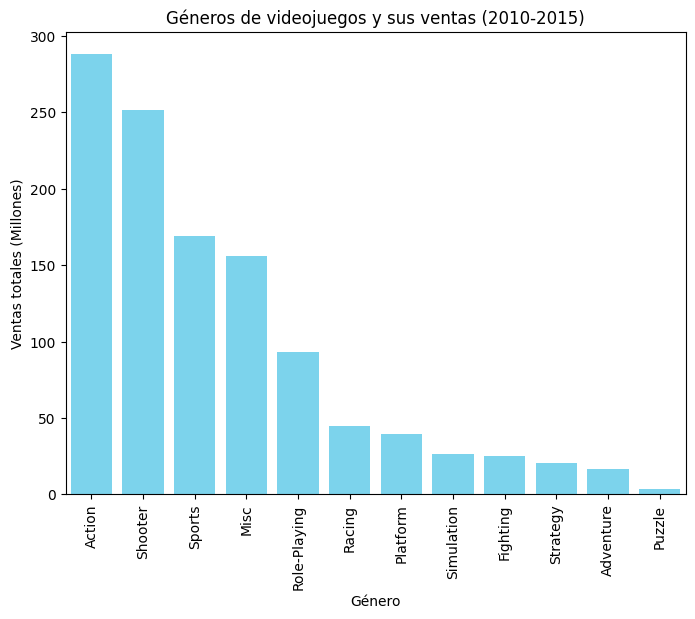

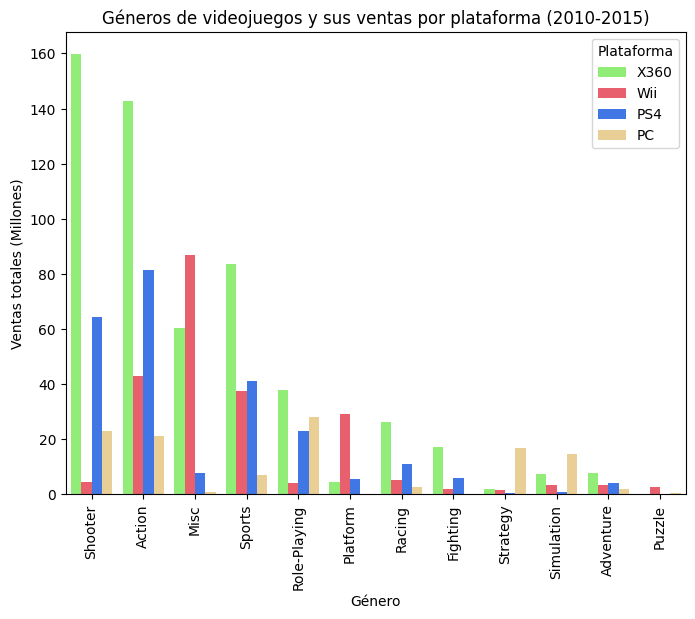

In [66]:
# Géneros de videojuegos y sus ventas
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_new_genre,
    x='genre',
    y='total_sales',
    color='#69DDFF'
)

plt.xticks(rotation=90)
plt.title("Géneros de videojuegos y sus ventas (2010-2015)")
plt.xlabel("Género")
plt.ylabel("Ventas totales (Millones)")
plt.show()

# Géneros de videojuegos y sus ventas por plataforma
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_new_genre_platform,
    x='genre',
    y='total_sales',
    hue='platform',
    palette=colors
)

print('')

plt.xticks(rotation=90)
plt.title("Géneros de videojuegos y sus ventas por plataforma (2010-2015)")
plt.xlabel("Género")
plt.ylabel("Ventas totales (Millones)")
plt.legend(title='Plataforma')
plt.show()

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

**Disitribución general de los juegos por género:**
* Los juegos de acción son los que más se venden con 287.91 millones de ventas, le siguen los juegos de disparos con 251.44 millones de ventas.
* En general, los 3 géneros que más ventas generan son: accióm, disparos y deportes.

**Disitribución de los juegos por género y plataforma:**
 Cuando hablamos de plataformas podemos diferenciar cuál es el género que más se vende dependiendo de la plataforma.
* En X360 el género que más se vende es 'Shooter' con 159.66 millones de ventas, esto quiere decir que de las ventas del género 'Shooter' el 63.49% se realizaron a través de la plataforma X360.
* La PS4 no logra liderar ningún género, sin embargo, el género que más vende es acción con hasta 81.52 millones de ventas. Esto representa solo el 28.22% de las ventas generales de este género.
* La Wii, en cambio, es la plataforma que más videojuegos vende del género 'Misc', un género bastante variado que incluye juegos que se centran en la relajación y la no violencia, esto probablemente porque la Wii es una consola que suele ser usada en su mayoría por niños. La Wii ha vendido 86.83 millones de juegos del género y ninguna otra plataforma ha logrado tantos números en este género. Wii se lleva más de la mitad de las ventas con un 55.76% de las ventas totales del género.
* Por último, PC, es la plataforma que lidera dos géneros diferentes: estrategia y simulación. Esto probablemente debido a las mecánicas de juego que ofrece la PC en comparación a otras plataformas. Se han vendido 16.66 millones de juegos del género 'Estrategia' y 14.63 millones de 'Simulación'


# Paso 4. Crea un perfil de usuario para cada región

### Perfil de usuario para Norte América

Las 5 plataformas principales en Norte América:

0    X360
1     PS2
2     Wii
3     PS3
4      DS
Name: platform, dtype: object

Los 5 géneros principales en Norte América:

0      Action
1      Sports
2     Shooter
3    Platform
4        Misc
Name: genre, dtype: object

Rating vs Ventas en Norte América:

      rating  na_sales
1          E   1292.99
6  No Rating   1242.46
8          T    759.75
5          M    748.48
2       E10+    353.32
4        K-A      2.56
3         EC      1.53
0         AO      1.26
7         RP      0.00


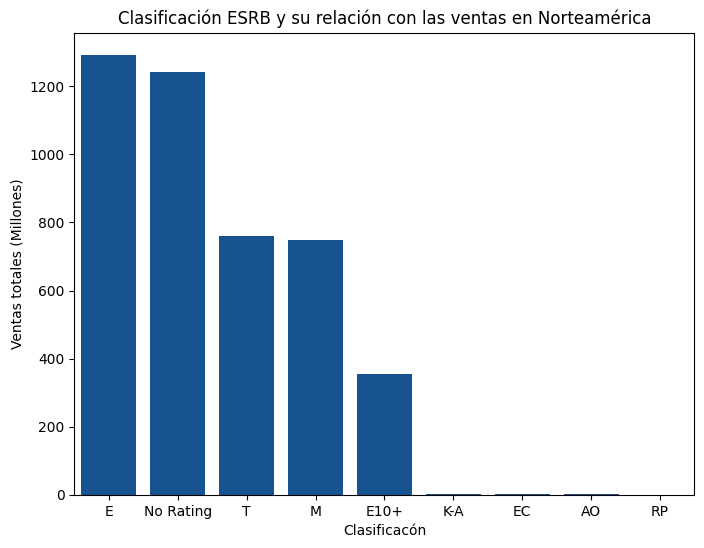

In [67]:
# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
# Los cinco géneros principales. Explica la diferencia.
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


# Cinco plataformas principales
user_profile_na = df[['platform', 'na_sales', 'genre', 'rating', 'name']]

na_best_platforms = (
    user_profile_na.groupby('platform')['na_sales'].sum()
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

top_5_na_best_platforms = na_best_platforms['platform'].head().reset_index(drop=True)
print(f'Las 5 plataformas principales en Norte América:\n\n{top_5_na_best_platforms}')
print('')

# Cinco géneros principales
na_best_genres = (
    user_profile_na.groupby('genre')['na_sales'].sum()
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

top_5_na_best_genres = na_best_genres['genre'].head().reset_index(drop=True)
print(f'Los 5 géneros principales en Norte América:\n\n{top_5_na_best_genres}')
print('')

# Relación entre puntaje ESRB y ventas
na_sales_and_rating = (
    user_profile_na.groupby('rating')['na_sales'].sum()
    .reset_index()
    .sort_values(by='na_sales', ascending=False)
)

print(f'Rating vs Ventas en Norte América:\n\n{na_sales_and_rating}')

# Gráfica relación puntaje ESRB y ventas

plt.figure(figsize=(8,6))

sns.barplot(
    data=na_sales_and_rating,
    x='rating',
    y='na_sales',
    color='#0353A4'
)

plt.title('Clasificación ESRB y su relación con las ventas en Norteamérica')
plt.xlabel("Clasificacón")
plt.ylabel("Ventas totales (Millones)")
plt.show()

En Norte América, la consola más vendida es X360, el género más vendido es acción   y el rating E (Everyone) es el que mas ventas genera probablemente porque abarca un publico mas grande que los otros géneros. En este caso son 1242.46 millones de ventas generadas por juegos sin clasificación.

### Perfil de usuario para Japón


Las 5 plataformas principales en Japón

0      DS
1      PS
2     PS2
3    SNES
4     3DS
Name: platform, dtype: object

Los 5 géneros principales en Japón

0    Role-Playing
1          Action
2          Sports
3        Platform
4            Misc
Name: genre, dtype: object

Rating vs Ventas en Japón

      rating  jp_sales
6  No Rating    841.96
1          E    198.11
8          T    151.40
5          M     64.24
2       E10+     40.20
4        K-A      1.46
0         AO      0.00
3         EC      0.00
7         RP      0.00


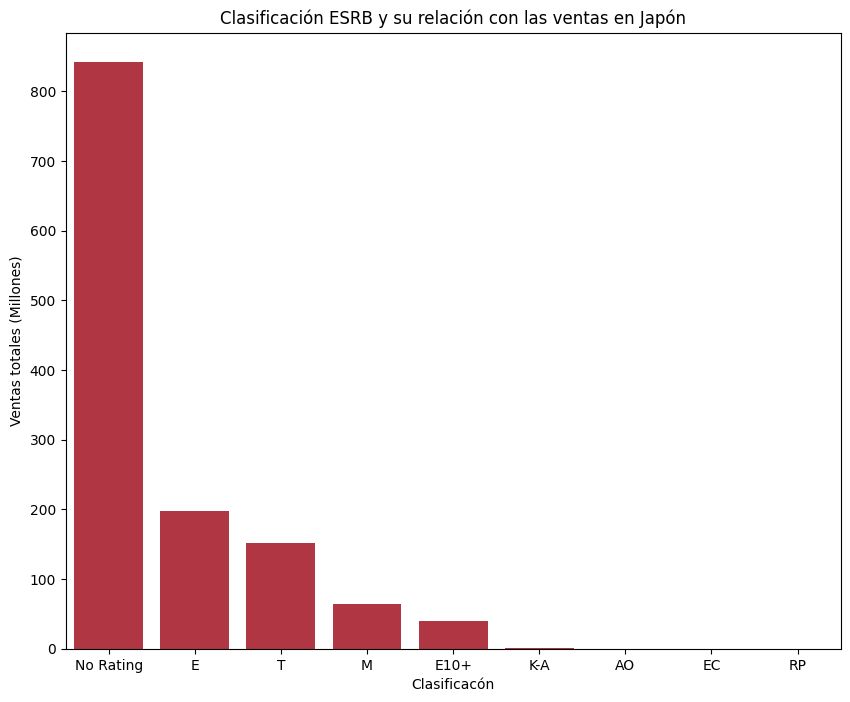

In [68]:
# Cinco plataformas principales
user_profile_jp = df[['platform', 'jp_sales', 'genre', 'rating', 'name']]

jp_best_platforms = (
    user_profile_jp.groupby('platform')['jp_sales'].sum()
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

top_5_jp_best_platforms = jp_best_platforms['platform'].head().reset_index(drop=True)
print(f'Las 5 plataformas principales en Japón\n\n{top_5_jp_best_platforms}')
print('')

# Cinco géneros principales
jp_best_genres = (
    user_profile_jp.groupby('genre')['jp_sales'].sum()
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

top_5_jp_best_genres = jp_best_genres['genre'].head().reset_index(drop=True)
print(f'Los 5 géneros principales en Japón\n\n{top_5_jp_best_genres}')
print('')

# Relación entre puntaje ESRB y ventas
jp_sales_and_rating = (
    user_profile_jp.groupby('rating')['jp_sales'].sum()
    .reset_index()
    .sort_values(by='jp_sales', ascending=False)
)

print(f'Rating vs Ventas en Japón\n\n{jp_sales_and_rating}')

# Gráfica relación puntaje ESRB y ventas

plt.figure(figsize=(10,8))

sns.barplot(
    data=jp_sales_and_rating,
    x='rating',
    y='jp_sales',
    color='#C52233'
)

plt.title('Clasificación ESRB y su relación con las ventas en Japón')
plt.xlabel("Clasificacón")
plt.ylabel("Ventas totales (Millones)")
plt.show()

En Japón la consola más vendida es la DS, el género más vendido es Role-Playing  y el rating 'No Rating' es el que mas ventas genera, parece ser que hay  un error en la ingesta de datos, ya que aún hay muchos datos sin clasificación. En este caso son 841.96 millones de ventas las que han generado juegos sin clasificación.

### Perfil de usuario para Europa

Las 5 plataformas principales en Europa

0     PS2
1     PS3
2    X360
3     Wii
4      PS
Name: platform, dtype: object

Los 5 géneros principales en Europa

0     Action
1     Sports
2    Shooter
3     Racing
4       Misc
Name: genre, dtype: object

Rating vs Ventas en Europa

      rating  eu_sales
1          E    710.25
6  No Rating    613.83
5          M    483.97
8          T    427.03
2       E10+    188.52
0         AO      0.61
4        K-A      0.27
3         EC      0.11
7         RP      0.08


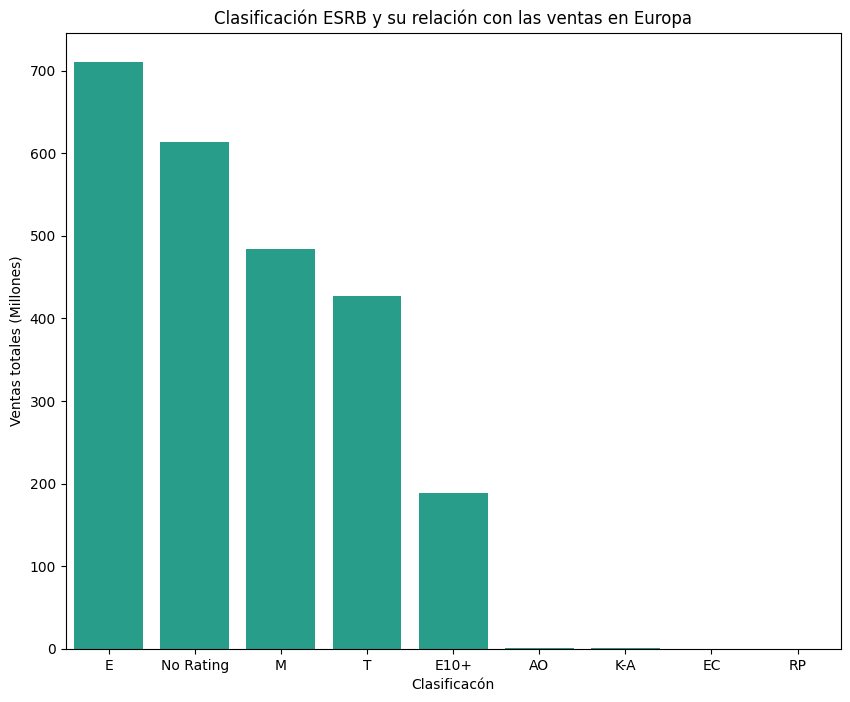

In [69]:
# Cinco plataformas principales
user_profile_eu = df[['platform', 'eu_sales', 'genre', 'rating', 'name']]

eu_best_platforms = (
    user_profile_eu.groupby('platform')['eu_sales'].sum()
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

top_5_eu_best_platforms = eu_best_platforms['platform'].head().reset_index(drop=True)
print(f'Las 5 plataformas principales en Europa\n\n{top_5_eu_best_platforms}')
print('')

# Cinco géneros principales
eu_best_genres = (
    user_profile_eu.groupby('genre')['eu_sales'].sum()
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

top_5_eu_best_genres = eu_best_genres['genre'].head().reset_index(drop=True)
print(f'Los 5 géneros principales en Europa\n\n{top_5_eu_best_genres}')
print('')

# Relación entre puntaje ESRB y ventas
eu_sales_and_rating = (
    user_profile_eu.groupby('rating')['eu_sales'].sum()
    .reset_index()
    .sort_values(by='eu_sales', ascending=False)
)

print(f'Rating vs Ventas en Europa\n\n{eu_sales_and_rating}')

# Gráfica relación puntaje ESRB y ventas

plt.figure(figsize=(10,8))

sns.barplot(
    data=eu_sales_and_rating,
    x='rating',
    y='eu_sales',
    color='#15B097'
)

plt.title('Clasificación ESRB y su relación con las ventas en Europa')
plt.xlabel("Clasificacón")
plt.ylabel("Ventas totales (Millones)")
plt.show()

En Europa la consola más vendida es la PS2, el género más vendido es Acción  y el rating 'E' es el que mas ventas genera, parece ser que hay  un error en la ingesta de datos, ya que aún hay muchos datos sin género. En este caso son 613.83 millones de ventas generadas por juegos sin clasificación.

#Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [70]:
# H0 = µXone = µPC
# Basándome en los resultados obtenidos anteriormente, es más probable que los usuarios de XOne califiquen
# mejor que los usuarios de PC, es con estos datos que formularé mi hipótesis alternativa.


xone_user_score = (df.loc[df['platform'] == 'XOne', 'user_score']).dropna()
pc_user_score = (df.loc[df['platform'] == 'PC',   'user_score']).dropna()

alpha = 0.05

res = st.ttest_ind(xone_user_score, pc_user_score)

print(f'Valor p: {res.pvalue:.10f}')

if res.pvalue < alpha:
  print('Rechazamos la hipótesis nula, la probabilidad de que ocurra H0 es muy baja\n\nHipótesis alternativa:\nH1 = μXOne > μPC')
else:
  print(
    "No podemos rechazar la hipótesis nula, el promedio es muy similar"
)

Valor p: 0.0000138964
Rechazamos la hipótesis nula, la probabilidad de que ocurra H0 es muy baja

Hipótesis alternativa:
H1 = μXOne > μPC


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [71]:
# H0 = µAcción = µDeportes
# Los géneros acción y deportes son los que más venden por lo que sus calificaciones pueden ser similares

action_user_score = (df.loc[df['genre'] == 'Action', 'user_score']).dropna()
sports_user_score = (df.loc[df['genre'] == 'Sports', 'user_score']).dropna()

alpha = 0.05

res = st.ttest_ind(action_user_score, sports_user_score)

print(f'Valor p: {res.pvalue:.10f}')

if res.pvalue < alpha:
  print('Rechazamos la hipótesis nula, la probabilidad de que ocurra H0 es muy baja\n\nHipótesis alternativa:\nH1: µAcción > µDeportes')
else:
  print('No podemos rechazar la hipótesis nula, el promedio es muy similar')

Valor p: 0.1040695136
No podemos rechazar la hipótesis nula, el promedio es muy similar


### — Cómo formulaste las hipótesis nula y alternativa.
### — Qué criterio utilizaste para probar las hipótesis y por qué.

Las hipótesis  nulas siempre deben de ser igualdades, para ambos casos, el umbral alfa era 0.05 ya que es lo más común y efectivo, las hipótesis nulas las generé basándome en los datos obtenidos durante todo el análisis estadístico.

#Paso 6. Escribe una conclusión general

Las ventas de videojuegos al rededor del mundo son muy variadas, no se venden ni los mismo géneros ni las mismas consolas ni en la misma frecuencia.

**1. Consolas más vendidas**
Los datos mostraron con claridad que las consolas/plataformas duran en promedio 10 años en el mercado, suelen ser reemplazadas con una versión mejorada de ellas mismas o de la competencia. La única consola/plataforma que se encuentra vigente desde 1985 hasta 2015 es la PC esto porque con el paso de los años, los datos que tenemos sobre la PC son muy generales, no distinguen de marcas o versiones. A pesar de esto, siempre ay 3 plataformas más que siempre puntean en el mercado, las empresas desarrolladores son aquellas que fabrican todas las versiones de Nintendo, PlayStation y Xbox.

**2. Géneros más vendidos**
Los géneros más vendidos son: acción, deportes y disparos, estos géneros son una constante en todo el mundo, aunque en Japón los más vendidos son juegos de Rol.

**3. Relación entre puntaje y ventas**
No existe una relación muy alta entre puntaje de usuarios y crítica con las ventas, esto puede deberse a que muchas de las ventas se esperan con anticipación cuando hacen parte de una gran franquicia como Halo, Mario Bros. o GTA. Por lo que el público ya está asegurado sin importar las calificaciones, esto y una buena estrategia de marketing puede asegurar más ventas que las buenas calificaciones. Pero aquellos juegos que se encuentren por debajo del puntaje promedio sí tienen menos ventas, probablemente porque son menos conocidos y las pocas reseñas que tienen afectan mucho más.

Históricamente la región y el género que más ventas han generado es Norteamérica con juegos de acción clasificación E, por lo que un juego que caiga dentro de estas categorías puede ser un éxito en Norteamérica.